In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.image as mp

In [2]:
# Load the data and seperates it into train and test data
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
# size of train and test data
print("x_train : ",train_images.shape)
print("y_train : ",train_labels.shape)
print("x_test : ",test_images.shape)
print("y_test : ",test_labels.shape)

x_train :  (50000, 32, 32, 3)
y_train :  (50000, 1)
x_test :  (10000, 32, 32, 3)
y_test :  (10000, 1)


In [4]:
train_images[42]

array([[[127, 126, 129],
        [148, 144, 144],
        [192, 181, 175],
        ...,
        [112, 102,  98],
        [144, 135, 123],
        [153, 142, 130]],

       [[ 89,  90,  94],
        [111, 110, 116],
        [151, 141, 137],
        ...,
        [161, 152, 129],
        [166, 158, 132],
        [163, 154, 128]],

       [[ 98,  94,  94],
        [ 94,  94,  99],
        [110, 109, 118],
        ...,
        [173, 159, 132],
        [169, 154, 129],
        [173, 157, 132]],

       ...,

       [[156, 152, 115],
        [151, 145, 107],
        [149, 144, 104],
        ...,
        [150, 144, 110],
        [149, 148, 114],
        [142, 143, 104]],

       [[163, 158, 122],
        [162, 155, 120],
        [161, 151, 118],
        ...,
        [135, 131,  99],
        [141, 137, 109],
        [138, 134, 103]],

       [[160, 152, 122],
        [160, 151, 120],
        [163, 153, 120],
        ...,
        [138, 121, 103],
        [143, 131, 107],
        [151, 135, 117]]

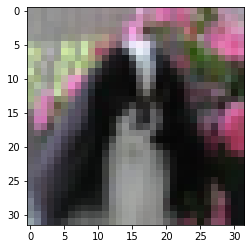

In [12]:
plt.imshow(test_images[42])
plt.show()

In [ ]:
# batch_size = 50
# img_width, img_height, img_num_channels = 32, 32, 3
# # loss_function = sparse_categorical_crossentropy
# no_classes = 10
# no_epochs = 100
# # optimizer = Adam()
# validation_split = 0.2
# verbosity = 1

In [ ]:
# input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# pd.DataFrame(train_images[0])

In [8]:
train_images = train_images/255
test_images = test_images/255

In [9]:
model = models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(train_images,train_labels,batch_size=50,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 68s 85ms/step - loss: 1.2048 - accuracy: 0.5663 - val_loss: 1.1854 - val_accuracy: 0.5737
Epoch 2/10
800/800 [==============================] - 70s 88ms/step - loss: 1.0343 - accuracy: 0.6360 - val_loss: 1.0490 - val_accuracy: 0.6332
Epoch 3/10
800/800 [==============================] - 71s 88ms/step - loss: 0.9085 - accuracy: 0.6808 - val_loss: 1.0407 - val_accuracy: 0.6346
Epoch 4/10
800/800 [==============================] - 63s 79ms/step - loss: 0.8223 - accuracy: 0.7112 - val_loss: 0.9179 - val_accuracy: 0.6764
Epoch 5/10
800/800 [==============================] - 62s 78ms/step - loss: 0.7409 - accuracy: 0.7388 - val_loss: 0.9169 - val_accuracy: 0.6809
Epoch 6/10
800/800 [==============================] - 64s 80ms/step - loss: 0.6655 - accuracy: 0.7673 - val_loss: 0.8424 - val_accuracy: 0.7119
Epoch 7/10
800/800 [==============================] - 63s 79ms/step - loss: 0.6125 - accuracy: 0.7857 - val_loss: 0.8955 - val_accuracy:

In [14]:
# Model summary tells about how the model is working
# Sicne we have input as 28x28 = 784 hence we have shape as 784
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [15]:
# Evaluation function to know the model score/accuracy
score = model.evaluate(test_images,test_labels)
print("Test score : ",score[0])
print("Test accuracy : ",score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.9711 - accuracy: 0.6998
Test score :  0.9710832238197327
Test accuracy :  0.6998000144958496


In [16]:
# Saving the model
model_name = 'cifar-10_CNN.h5'
model.save(model_name, save_format='h5')

In [17]:
predict_result = model.predict(test_images[42].reshape(1,32,32,3))
# Print the prediction result
print(predict_result)
# Find the predicted class
predict_class = predict_result.argmax()
# Find the prediction probability
predict_prob = predict_result.max()

[[2.9318553e-05 1.7942104e-06 1.0871204e-04 2.7451621e-02 5.0810329e-04
  9.5214880e-01 5.2400776e-07 1.9716751e-02 2.1533431e-07 3.4127181e-05]]


In [18]:
print(f"Image belongs to class: {predict_class}\n Prob is: {predict_prob}")

Image belongs to class: 5
 Prob is: 0.9521487951278687
